<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/DataScience/210205_Support_Vector_Machine_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#210205 Support Vector Machine 2

지난번에 이어 Support Vector Machine을 다루고자 한다.
주어진 샘플이 선형으로 나뉘지 않을 경우 다른 방법을 생각해야 했다.

그 방법 중 하나가 Kernel을 사용한 방법인데, Kernel이 무엇인지부터 차근차근 알아보려고 한다.


## 1, New Strategy?
도저히, 선형 모델만으로는 풀 수 없는 상황을 생각해보고자 한다.
이는 XOR을 활용하여 만들 수 있는데. 입력변수 2개가 0, 1로 주어질때 입력변수가 같으면 0, 다르면 1을 출력하는 함수가 XOR이다.




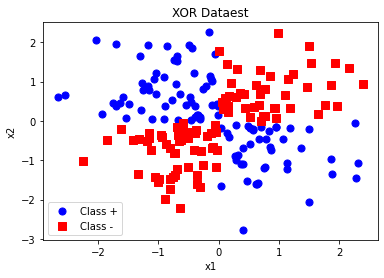

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='o', label='Class +', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='r', marker='s', label='Class -', s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR Dataest")
plt.show()

딱봐도 현재 상태로는 기존의 SvM을 사용하는 것은 불가능해 보인다.
이를 극복하기 위한 방법에는 어떤 것이 있을까?

생각할 수 있는 방법 중에 하나는 **sample set에 적당한 함수를 적용하여** 선형 SVM을 적용할 수 있는 상황으로 변환하는 것이다.

위의 예제는 평면 상에서는 답이 없다.(...) 3차원으로 혹은 더 고차원으로 확장하면 어떻게 될까? 이를 활용하는 방법이 Kernel 트릭이다.

## 2. Kernel함수와 그 예시

Kernel이 무엇인지에 대해 알아보려 한다.
커널함수는 내적을 통해 더 고차원으로 보내는 함수라고 생각하면 된다.

잠시만.. 내적? 내적이 왜 나오는지에 대해 고려하고 정확하게 정의하려고 한다.

위의 XOR 문제로 돌아오자.

$$ \phi(x_{1}, x_{2}) = (x_{1}^{2}, \sqrt{2}x_{1}x_{2},x_{2}^{2})$$
를 사용하여 변환한다면, 변환 결과는 다음과 같다.

$$ (0, 0) -> (0, 0, 0)\\ 
(0, 1) -> (0, 0, 1)\\
(1, 0) -> (1, 0, 0)\\
(1, 1) -> (1, \sqrt{2}, 1) $$

이를 3차원에 표현해서 그림을 그려보면, 대각선으로 잘 나누면 (0,0),(1,1)과 (0,1),(1,0) 두 개의 점씩 분류되는 초평면을 찾을 수 있다. 초평면이 존재한다는 것은, 최대 마진을 가진 초평면도 존재할것이라는 것이다.

이러한 변환 함수는 
$$ \phi(x_{i})^{T}\phi(x_{j})$$의 형태로 표현 가능하다. (벡터 표현일 경우)

따라서 두 개의 변환된 독립 변수 벡터를 내적한 함수를 kernel이라고 한다.

$$k(x_{i},x_{j}) =  \phi(x_{i})^{T}\phi(x_{j})$$

그러면 위의 상황을 kernel로 어떻게 해석해야 할까?

$$(x \cdot z)^{2} = (x_{1}z_{1} + x_{2}z_{2})^{2} = \\
x_{1}^{2}z_{1}^{2}+2x_{1}x_{2}z_{1}z_{2}+x_{2}^{2}z_{2}^{2} \\
= \phi(x_{1},x_{2})\cdot\phi(z_{1},z_{2})$$ 

자주 쓰이는 kernel등을 정리하면 다음과 같다.

- 선형 커널
$$ k(x_{1},x_{2}) = x_{1}^{T}x_{2}$$
- 가우시안 커널
$$ k(x_{1},x_{2}) = exp(-\frac{||x_{1}-x_{2}||^{2}}{2\sigma^{2}})$$